In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from moudle.pre_process import *
from moudle.segment import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
src_data=open("data/position.txt")
corpus=src_data.read().split('\n')


position_num=20000
dutys=[]
for item in corpus[:-1]:
    position=position_vec_all(item)
    if position:
        if position[3]:
            dutys.append(position[3])
            
            

In [3]:

duty_seg=[]
for duty in dutys:
    duty_seg.append(text_segment(duty,8))
    

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/05/qgxy3zyx40jflp070rrvt8x80000gn/T/jieba.cache
DEBUG:jieba:Loading model from cache /var/folders/05/qgxy3zyx40jflp070rrvt8x80000gn/T/jieba.cache
Loading model cost 0.598 seconds.
DEBUG:jieba:Loading model cost 0.598 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


In [4]:

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
vectorizer = TfidfVectorizer(min_df=0.006,max_df=0.01, decode_error='ignore')
X = vectorizer.fit_transform(duty_seg)
X=X.toarray()

print X.shape
print len(duty_seg)


(31235, 116)
31235


/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


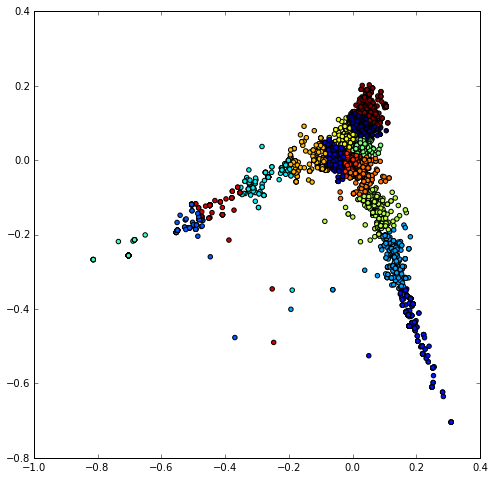

In [5]:
num_clusters=15
km = KMeans(n_clusters=num_clusters, n_init=1, random_state=3)

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
pca=PCA(n_components=2)
pca_X=pca.fit_transform(X)

plt.figure(figsize=(8, 8))
pca_Y= km.fit_predict(pca_X)
scatter(pca_X[:, 0], pca_X[:, 1], c=pca_Y)

In [6]:
from sklearn.cluster import KMeans
# num_clusters=15
km = KMeans(n_clusters=num_clusters, n_init=1, random_state=3)
clustered = km.fit(X)

def get_key_words(matrix,i,min_df):
    key_words=""
    select=matrix[i]>min_df
    for idx in np.arange(length)[select]:
        key_words=key_words+word_list[idx]+" "
    print key_words
    
word_list=vectorizer.get_feature_names()
length=X.shape[1]  
for i in range(num_clusters):
    print i
    get_key_words(km.cluster_centers_,i,0.005)

0
不定期 专项 修订 内控 协议 可行性研究 合理化 后续 对拟 拟订 按照 授信 梳理 检查 法律法规 洽谈 现场 管控 结构设计 绩效考核 论证 贷后 过程 金融业务 项目前期 项目风险 预警 
1
业务培训 事务性 保持良好 准备 凭证 合理化 客户档案 市场动态 开发新 录入 授信 核对 梳理 每日 沙龙 洽谈 满意度 登记 线上 绩效考核 访谈 财务报表 账务 贷款 转化率 追踪 销售策略 
2
交代 保持良好 公司财务 内控 凭证 可行性研究 拟订 核对 检查 模式 申报 登记 盈利 管控 绩效考核 讲座 财务报表 财务管理 账务 费用 预算 
3
专业化 代销 优质 保持良好 全方位 动向 发掘 合理化 增值 客户档案 客户经理 开发新 按照 授信 每日 现有 线上 讲座 贷款 软件 销售策略 
4
ipo 不定期 专题研究 代销 优质 会议 依据 保持良好 全方位 准备 券商 发掘 可行性研究 宏观 客户经理 对拟 市场动态 录入 拟订 挂牌 推荐 模式 汇报 沙龙 洽谈 深入研究 深度 现场 行业动态 论证 访谈 财务报表 软件 过程 运维 项目组 预警 
5
ipo 不定期 专业化 专项 专题 专题研究 业务培训 中介机构 事务性 交代 交易系统 代销 优质 会议 估值 依据 保持良好 信用 修订 公司财务 内控 准备 分行 创意 前期 功能 动向 协议 发掘 可行性研究 合理化 后续 增值 宏观 定价 实盘 审批 客户端 对拟 市场动态 底稿 建模 承销 技术支持 拟订 挂牌 按照 推荐 操盘手 架构设计 核对 核心 梳理 模式 每日 汇报 沙龙 法律法规 洽谈 深入研究 深度 现场 现有 申报 申报材料 盈利 结构设计 绩效考核 衍生品 论证 访谈 负责管理 财务管理 账务 软件 过程 运维 运行 追踪 金融业务 销售策略 项目组 
6
中介机构 事务性 交易系统 代销 估值 修订 凭证 功能 协议 后续 审批 录入 披露 核对 检查 每日 法律法规 清算 登记 结构设计 财务报表 账务 过程 运维 运行 
7
不定期 专业化 业务培训 代销 优质 全方位 准备 增值 技术支持 拟订 授信 推荐 架构设计 核心 梳理 模式 清算 甄选 竞争对手 管控 组建 绩效考核 追踪 销售策略 预算 
8
专业化 专题 业务培训 个性化 优质 信用 全

In [ ]:
Y=clustered.predict(X)
plt.hist(Y,bins=num_clusters,facecolor='blue', alpha=0.5)